In [1]:
!pip install -q tflite-model-maker

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from PIL import Image

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [4]:
import shutil
path = os.getcwd()
abspath = os.path.abspath(os.path.join(path, os.pardir))

myPathHelper = abspath + '/imagesV2/'                             
folderList = os.listdir(myPathHelper)

In [5]:
import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = myPathHelper
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  AngelaMerkel
file  /tf/src/imagesV2/AngelaMerkel/images  has an invalid extension  images
*** fatal error, you a sub directory  images  in class directory  AngelaMerkel
*** fatal error, you a sub directory  jpeg  in class directory  AngelaMerkel
file  /tf/src/imagesV2/AngelaMerkel/labels  has an invalid extension  labels
*** fatal error, you a sub directory  labels  in class directory  AngelaMerkel
processing class directory  AnnalenaBaerbock
file  /tf/src/imagesV2/AnnalenaBaerbock/images  has an invalid extension  images
*** fatal error, you a sub directory  images  in class directory  AnnalenaBaerbock
*** fatal error, you a sub directory  jpeg  in class directory  AnnalenaBaerbock
file  /tf/src/imagesV2/AnnalenaBaerbock/labels  has an invalid extension  labels
*** fatal error, you a sub directory  labels  in class directory  AnnalenaBaerbock
processing class directory  AnthonyFauci
file  /tf/src/imagesV2/AnthonyFauci/images  has an invalid extension  image

file  /tf/src/imagesV2/ManuelNeuer/images  has an invalid extension  images
*** fatal error, you a sub directory  images  in class directory  ManuelNeuer
*** fatal error, you a sub directory  jpeg  in class directory  ManuelNeuer
file  /tf/src/imagesV2/ManuelNeuer/labels  has an invalid extension  labels
*** fatal error, you a sub directory  labels  in class directory  ManuelNeuer
processing class directory  MaxVerstappen
file  /tf/src/imagesV2/MaxVerstappen/images  has an invalid extension  images
*** fatal error, you a sub directory  images  in class directory  MaxVerstappen
*** fatal error, you a sub directory  jpeg  in class directory  MaxVerstappen
file  /tf/src/imagesV2/MaxVerstappen/labels  has an invalid extension  labels
*** fatal error, you a sub directory  labels  in class directory  MaxVerstappen
processing class directory  MichaelJackson
file  /tf/src/imagesV2/MichaelJackson/images  has an invalid extension  images
*** fatal error, you a sub directory  images  in class dir

In [6]:
jpegFolder = abspath + '/imagesV2jpeg'

if not os.path.exists(jpegFolder):
    os.mkdir(jpegFolder)

In [18]:
for folder in folderList:
    print(folder)
    jpgPath = myPathHelper +'/' + folder + '/images'
    myPath = jpegFolder + '/' + folder
    
    if not os.path.exists(myPath):
            os.mkdir(myPath)
    
    myFiles = [f for f in os.listdir(jpgPath) if f.endswith('.jpg')]
    #print(myPath)
    for i, file in enumerate(myFiles):
        #print(file)
        im1 = Image.open(f'{jpgPath}/{file}')
        fileNoEnding, ext = os.path.splitext(f'{file}')
        im1.save(f'{myPath}/{fileNoEnding}.jpeg')

AngelaMerkel
AnnalenaBaerbock
AnthonyFauci
ArnoldSchwarzenegger
BarackObama
BenedictCumberbatch
BradPitt
ChadwickBoseman
ChrisHemsworth
ChrisPratt
ChristianBale
ChristianLindner
CristianoRonaldo
DenzelWashington
DonaldTrump
DwayneJohnson
EdSheeran
ElonMusk
ElyasM'barek
GeorgeClooney
GüntherJauch
HeidiKlum
HeleneFischer
JasonMomoa
JeffBezos
JoeBiden
JudithRakers
KarlLauterbach
KobeBryant
LeBronJames
LeonardoDiCaprio
LewisHamilton
LionelMessi
MacKenzieScott
ManuelNeuer
MaxVerstappen
MichaelJackson
MichaelJordan
MorganFreeman
NovakDjokovic
OlafScholz
RafaelNadal
RobertDowneyJr
RogerFederer
SebastianVettel
ShaquilleO'Neal
StefanRaab
SylvesterStallone
TomCruise
TomHanks
TomHardy
TomHiddleston
VinDiesel
WillSmith
WladimirPutin
XiJinping


In [7]:
data = DataLoader.from_folder(jpegFolder)
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

INFO:tensorflow:Load image with size: 16799, num_label: 56, labels: AngelaMerkel, AnnalenaBaerbock, AnthonyFauci, ArnoldSchwarzenegger, BarackObama, BenedictCumberbatch, BradPitt, ChadwickBoseman, ChrisHemsworth, ChrisPratt, ChristianBale, ChristianLindner, CristianoRonaldo, DenzelWashington, DonaldTrump, DwayneJohnson, EdSheeran, ElonMusk, ElyasM'barek, GeorgeClooney, GüntherJauch, HeidiKlum, HeleneFischer, JasonMomoa, JeffBezos, JoeBiden, JudithRakers, KarlLauterbach, KobeBryant, LeBronJames, LeonardoDiCaprio, LewisHamilton, LionelMessi, MacKenzieScott, ManuelNeuer, MaxVerstappen, MichaelJackson, MichaelJordan, MorganFreeman, NovakDjokovic, OlafScholz, RafaelNadal, RobertDowneyJr, RogerFederer, SebastianVettel, ShaquilleO'Neal, StefanRaab, SylvesterStallone, TomCruise, TomHanks, TomHardy, TomHiddleston, VinDiesel, WillSmith, WladimirPutin, XiJinping.


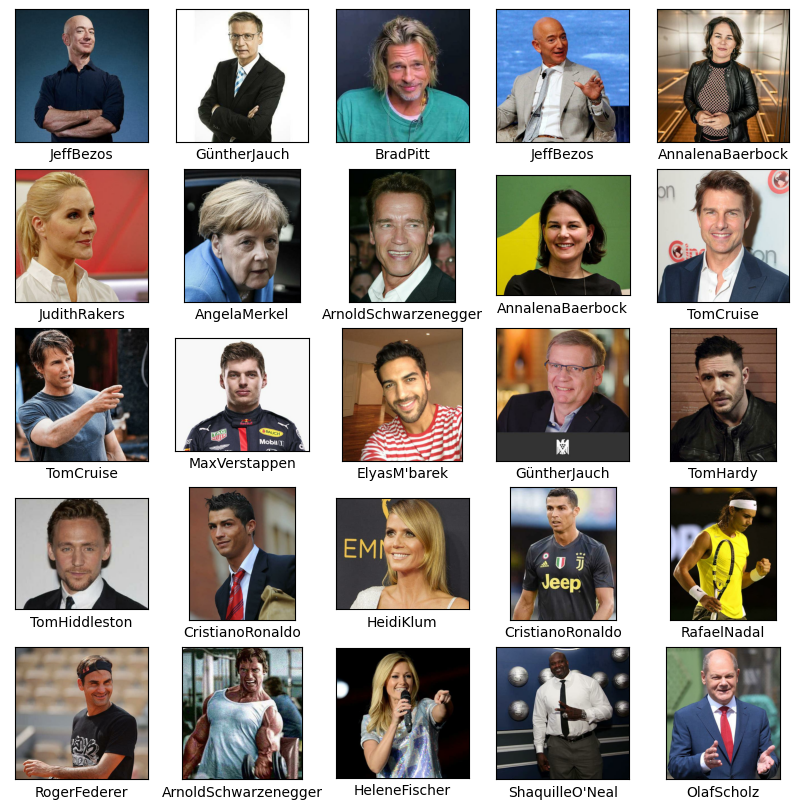

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [9]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 56)                71736     
                                                                 
Total params: 3,484,760
Trainable params: 71,736
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


419/419 [==============================] - 23s 49ms/step - loss: 3.2680 - accuracy: 0.2275 - val_loss: 2.7684 - val_accuracy: 0.3935
Epoch 2/5
419/419 [==============================] - 20s 48ms/step - loss: 2.6132 - accuracy: 0.4266 - val_loss: 2.4865 - val_accuracy: 0.4774
Epoch 3/5
419/419 [==============================] - 20s 48ms/step - loss: 2.3781 - accuracy: 0.5076 - val_loss: 2.3490 - val_accuracy: 0.5244
Epoch 4/5
419/419 [==============================] - 20s 47ms/step - loss: 2.2320 - accuracy: 0.5577 - val_loss: 2.2612 - val_accuracy: 0.5536
Epoch 5/5
419/419 [==============================] - 20s 48ms/step - loss: 2.1379 - accuracy: 0.5847 - val_loss: 2.1991 - val_accuracy: 0.5732


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 56)                71736     
                                                                 
Total params: 3,484,760
Trainable params: 71,736
Non-trainable params: 3,413,024
_________________________________________________________________


In [11]:
loss, accuracy = model.evaluate(test_data)

53/53 [==============================] - 6s 35ms/step - loss: 2.2758 - accuracy: 0.5548


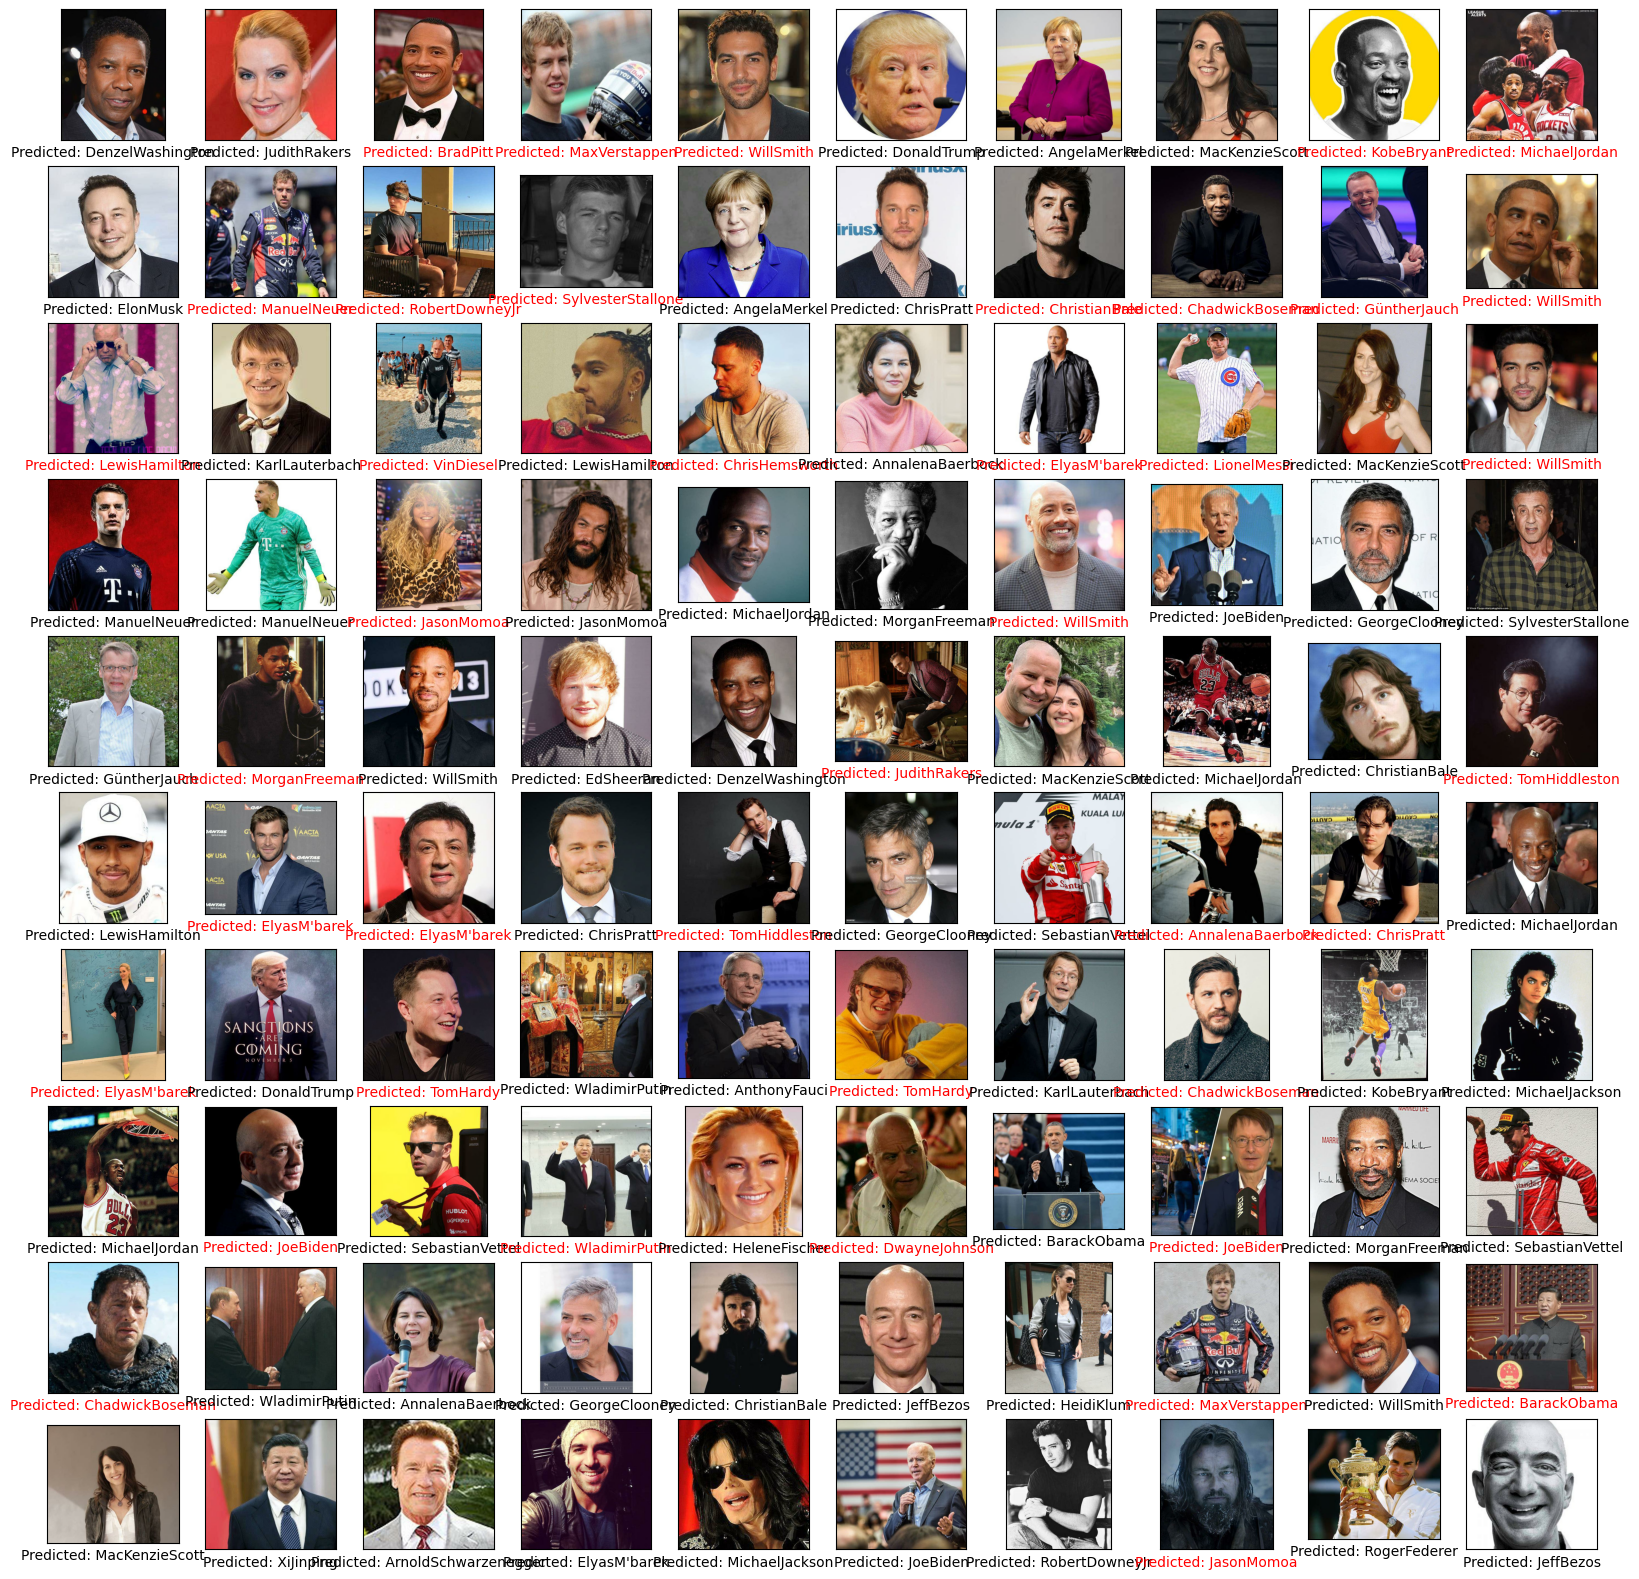

In [12]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [27]:
model.export(export_dir=f'{abspath}/models/classification/V2/')

INFO:tensorflow:Assets written to: /tmp/tmpichjmnl8/assets


INFO:tensorflow:Assets written to: /tmp/tmpichjmnl8/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpjfue_gxu/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpjfue_gxu/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: /tf/src/models/classification/V2/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /tf/src/models/classification/V2/model.tflite


In [31]:
model.evaluate_tflite(f'{abspath}/models/classification/V2/model.tflite', test_data)

{'accuracy': 0.5505952380952381}